# **PHONE** **PRICE** **RANGE** **PROJECT**

DEVELOPED BY HEMANT SINGH

# **Github link**

https://github.com/HeMANSC/HeMANSC/blob/4f17863ecafbad4b692984ec100007ee6f715a6f/Final_PHONE_PRICE_RANGE.ipynb

# **PROJECT** **SUMMARY**


The dataset contains 21 features about mobile phones, including performance (e.g., RAM, CLOCK_SPEED), camera specifications (FC, PC), screen details (SC_H, SC_W), battery capacity (BATTERY_POWER), and connectivity options (WIFI, BLUE). The target variable is PRICE_RANGE, categorizing phones into price segments. The data helps predict phone prices, understand customer preferences, and analyze which features appeal to different segments. It can also be used to simulate how customers might respond to new phones with different features. This dataset is useful for product development, pricing strategies, and customer targeting.

# **PROBLEMS**

The problems focus on **Predicting phone Price ranges** using features, identifying **Feature preferences** across customer segments, and forecasting customer responses to **New phone models**. These insights help optimize pricing, target customers effectively, and design customer-centric products

# **DATA** **UNDERSTANDING**


In [83]:
import codecs
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report\

import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('/content/data_mobile_price_range.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [86]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [87]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


## **UNDERSTANDING THE VARIABLES**

1. BATTERY_POWER: Battery capacity of the mobile (measured in mAh).

2. BLUE: Indicates whether the phone has Bluetooth (1 for yes, 0 for no).

3. CLOCK_SPEED: Speed of the processor (in GHz).

4. DUAL_SIM: Indicates if the phone supports dual SIM cards (1 for yes, 0 for no).

5. FC: Front camera megapixels.

6. FOUR_G: Indicates if the phone supports 4G connectivity (1 for yes, 0 for no).

7. INT_MEMORY: Internal memory/storage capacity (in GB).

8. M_DEP: Mobile depth/thickness (in cm).

9. MOBILE_WT: Weight of the mobile phone (in grams).

10. N_CORES: Number of processor cores.

11. PC: Primary camera megapixels.

12. PX_HEIGHT: Pixel height of the display.

13. PX_WIDTH: Pixel width of the display.

14. RAM: Random Access Memory (RAM)
capacity (in MB or GB).

15. SC_H: Screen height of the mobile (in cm).

16. SC_W: Screen width of the mobile (in cm).

17. TALK_TIME: Battery backup in hours of talk time.

18. THREE_G: Indicates if the phone supports 3G connectivity (1 for yes, 0 for no).

19. TOUCH_SCREEN: Indicates whether the phone has a touchscreen (1 for yes, 0 for no).

20. WIFI: Indicates whether the phone supports WiFi (1 for yes, 0 for no).

21. PRICE_RANGE: Likely a categorical variable indicating the price range (e.g., 0 for low-cost, 1 for mid-range, etc.).





# **EXPLANATORY DATA ANALYSIS**

In [88]:
cols = df.columns

In [89]:
#box plots to check outliers
cols = df.columns

for i in cols:
  fig = px.box(df, y=i)
  fig.update_layout(title=i)
  fig.show()

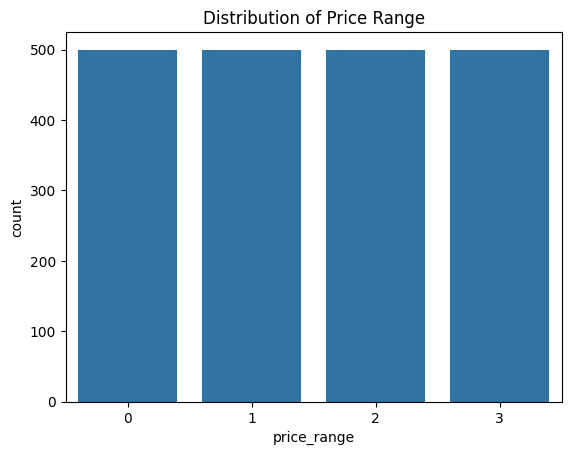

In [90]:
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Range')
plt.show()

In [91]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


Analyze the distribution of the target variable PRICE_RANGE to understand the balance of classes

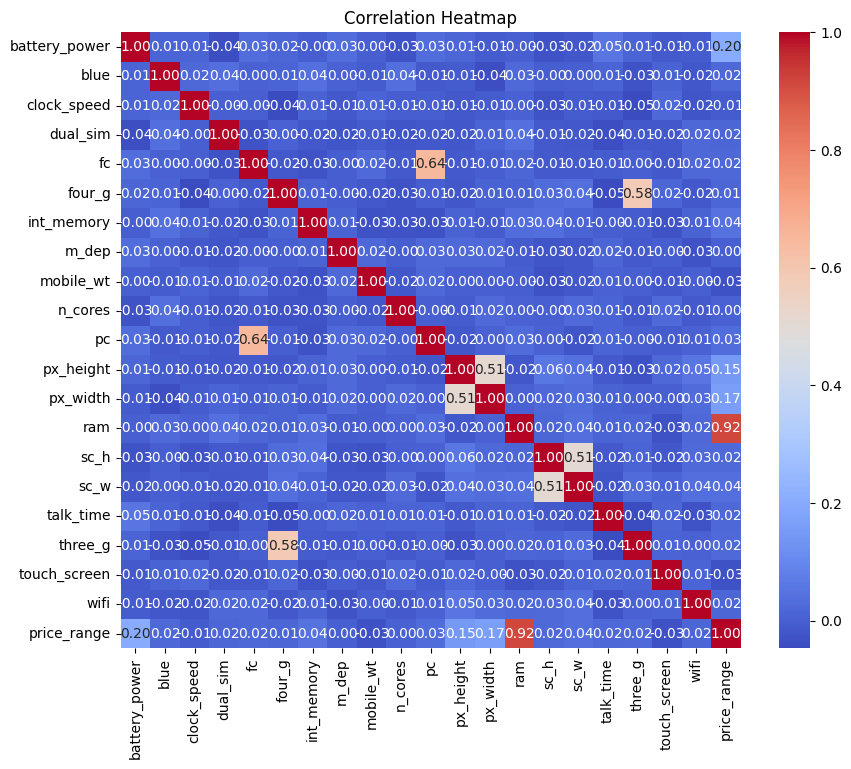

In [92]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

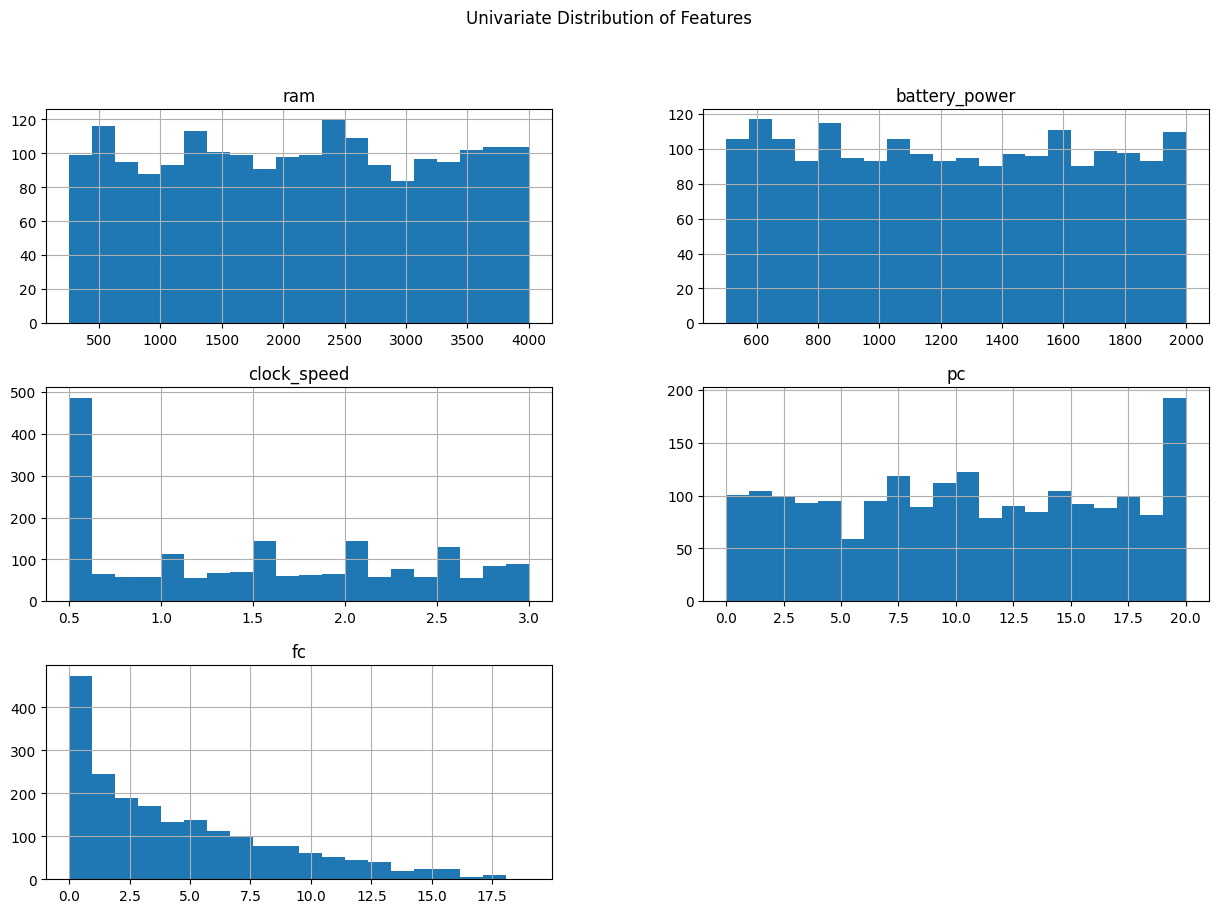

In [93]:
features = ['ram', 'battery_power', 'clock_speed', 'pc', 'fc']
df[features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Univariate Distribution of Features')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['ram', 'battery_power', 'clock_speed', 'pc', 'fc', 'price_range']], hue='price_range')
plt.show()

In [ ]:
#Use boxplots to compare feature distributions across different price ranges.
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM Distribution by Price Range')
plt.show()

In [ ]:
import plotly.express as px
# Create the boxplot using Plotly
fig = px.box(df, x='price_range', y='battery_power', title='Battery Power by Price Range')

# Show the plot
fig.show()


In [ ]:
#Perform clustering (e.g., K-Means) to segment customers based on features.
from sklearn.cluster import KMeans

# Select features for clustering
features = ['ram', 'battery_power', 'clock_speed', 'pc']
X = df[features]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.pairplot(df[['ram', 'battery_power', 'clock_speed', 'pc', 'Cluster']], hue='Cluster')
plt.show()

In [ ]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(cluster_centers)

           ram  battery_power  clock_speed         pc
0  3430.309951    1244.566069     1.511256  10.003263
1  2206.961933    1220.215227     1.518448  10.117130
2   906.663352    1251.009943     1.535511   9.646307


## Predicting Customer Preferences for New Models

In [ ]:
df['ram'].value_counts()

,count
ram,
1464,4
3142,4
2610,4
2227,4
1229,4
...,...
2312,1
2167,1
3508,1


In [ ]:
import plotly.express as px
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Loop through numeric columns to create box plots
for column in numeric_columns[:-1]:  # Exclude 'price_range'
    fig = px.box(df, x='price_range', y=column, title=f"{column} by Price Range", color='price_range')
    fig.update_layout(width=600, height=400)
    fig.show()

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="magma", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import plotly.express as px

# Loop through the numeric columns and create histograms for each
for column in numeric_columns:
    fig = px.histogram(df, x=column, nbins=30, marginal="box", color_discrete_sequence=["red"])
    fig.update_layout(title=f"Distribution of {column}",width=600,
        height=400)
    fig.show()

**1. Feature Distributions**

a. Battery Power (battery_power):

- Values range from 501 to 1998 mAh.

- Higher battery power is generally associated with higher price ranges, suggesting that this feature strongly influences pricing.

b. RAM (ram):

- Ranges widely from 256 MB to 3998 MB.

- A clear positive correlation exists between RAM and price_range. Phones with more RAM tend to be in higher price ranges.

c. Screen Resolution (px_height, px_width):

- Both have wide ranges but show positive associations with price_range. Phones with higher resolution screens are generally more expensive.

d. Camera Features (fc, pc):

- Both front camera (fc) and primary camera (pc) have no clear trends with price_range. This might indicate a weaker influence of camera megapixels on pricing.

**2. Categorical Features**

a. Connectivity (3G, 4G):

- Most devices support 3G, and a significant proportion also supports 4G.
Devices with both 3G and 4G are likely in higher price ranges.

b. Other Binary Features (blue, dual_sim, touch_screen, wifi):


- These features are relatively balanced across all price ranges, indicating they are not exclusive to high-end phones.

**3. Correlations**

a. Strong Correlations:

- ram is the strongest predictor of price_range with a high positive correlation.
battery_power also shows a significant positive correlation with price_range.

b. Weak/Insignificant Correlations:

- Features like clock_speed, talk_time, and n_cores show weak or no correlation with price_range.

**4. Feature-Target Relationships**

- Features like ram, battery_power, and px_width show clear trends with price_range. These are likely important predictors in any modeling effort.
Other features like dual_sim, blue, and touch_screen are less distinctive between price categories.

**5. General Observations**

- High-performing features like ram and battery_power are essential in distinguishing phones across price ranges.

- Most binary features (three_g, four_g, etc.) are common across price ranges, with marginal influence on pricing.

- Data sparsity in some features (e.g., px_height with many values near zero) might need further investigation.

# **FEATURE** **ENGINEERING**

In [ ]:
# Check distribution of the target variable
df['price_range'].value_counts(normalize=True)

# Analyze the impact of px_height with zeros
zero_px_height_count = (df['px_height'] == 0).sum()
zero_px_height_count_percentage = zero_px_height_count / len(df) * 100

# Replace zeros in px_height with the median of non-zero values
non_zero_median = df.loc[df['px_height'] != 0, 'px_height'].median()
df['px_height'] = df['px_height'].replace(0, non_zero_median)

# Feature engineering: Calculate screen area
df['screen_area'] = df['sc_h'] * df['sc_w']

# Review dataset updates
df[['px_height', 'screen_area']].describe(), zero_px_height_count_percentage


In [ ]:
non_zero = df.loc[df['screen_area'] != 0, 'screen_area'].median()
df['screen_area'] = df['screen_area'].replace(0, non_zero)

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now you have X_train, X_test, y_train, y_test ready for classification models
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()

In [ ]:
df.drop(['touch_screen',,'four_g','blue','dual_sim','three_g','wifi'], axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# **MODEL** **IMPLEMENTATION**

In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
# r2 = r2_score(y_test, rf_model.predict(X_test))
# print(f"R-squared: {r2:.2f}")

# accuracy = r2 * 100
# print(f"Model Accuracy: {accuracy:.2f}%")
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

In [ ]:
# XGBoost
xgb_model = XGBClassifier(random_state=42,eval_metric='logloss',use_label_encoder=False)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("\nXGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# **HYPERPARAMETER** **TUNING**

In [ ]:
# Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # 'liblinear' supports both l1 and l2 penalties
}

lr_model = LogisticRegression(random_state=42, max_iter=1000)
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("\nBest hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_
lr_pred = best_lr_model.predict(X_test)
tuned_logreg_accuracy = accuracy_score(y_test, lr_pred)

print("\nLogistic Regression Accuracy (after tuning):", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

In [ ]:
#Hyperparameter tuning for Random forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)
tuned_rf_accuracy = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Accuracy (after tuning):", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

In [ ]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("\nBest hyperparameters for Decision Tree:", grid_search_dt.best_params_)
best_dt_model = grid_search_dt.best_estimator_
dt_pred = best_dt_model.predict(X_test)
tuned_dt_accuracy = accuracy_score(y_test, dt_pred)

print("\nDecision Tree Accuracy (after tuning):", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


In [81]:
#hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=True, eval_metric='logloss') #use_label_encoder for newer versions of xgboost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

print("\nBest hyperparameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)
tuned_xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("\nXGBoost Accuracy (after tuning):", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


Best hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

XGBoost Accuracy (after tuning): 0.94
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.88      0.92      0.90        25
           2       1.00      0.91      0.95        23
           3       0.96      1.00      0.98        27

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



# **TABLE OF ACCURARIES**

In [82]:
logreg_accuracy = accuracy_score(y_test, logreg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Accuracy after hyperparameter tuning
tuned_logreg_accuracy = accuracy_score(y_test, lr_pred)
tuned_rf_accuracy = accuracy_score(y_test, rf_pred)
tuned_dt_accuracy = accuracy_score(y_test, dt_pred)
tuned_xgb_accuracy = accuracy_score(y_test, xgb_pred)


data = {
    'Algorithm': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Accuracy (Before Tuning)': [logreg_accuracy, rf_accuracy, dt_accuracy, xgb_accuracy],
    'Accuracy (After Tuning)': [tuned_logreg_accuracy, tuned_rf_accuracy, tuned_dt_accuracy, tuned_xgb_accuracy],
}
df_results = pd.DataFrame(data)
df_results

,Algorithm,Accuracy (Before Tuning),Accuracy (After Tuning)
0,Logistic Regression,0.67,0.82
1,Random Forest,0.89,0.89
2,Decision Tree,0.87,0.87
3,XGBoost,0.94,0.94
